In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data

data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# create X and y

X = data.drop(columns = 'label', axis=1)
y = data['label']

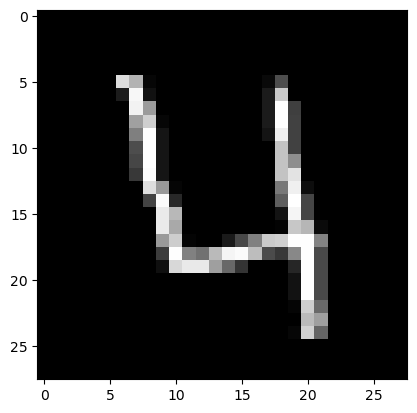

In [9]:
# interpret the image

digit = np.array(X.iloc[3])
digit = digit.reshape(28, 28)
plt.imshow(digit, cmap='gray')
plt.show()

In [13]:
?keras.layers.Dense

In [19]:
# build a neural network

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X.shape[-1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
# compile the model

model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [22]:
# train the data

model.fit(X, y, epochs=5, batch_size=64)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9434 - loss: 0.2044
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9624 - loss: 0.1274
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9652 - loss: 0.1167
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9679 - loss: 0.1032
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9700 - loss: 0.0946


In [23]:
# load the test data

X_test = pd.read_csv('test.csv')

In [30]:
X_test.shape

(28000, 784)

In [26]:
# predict on test data

y_pred = model.predict(X_test).argmax(axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [28]:
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [33]:
img_id = [i for i in range(1, 28001)]

submission_df = pd.DataFrame({
    'ImageId': img_id,
    'Label': y_pred
})

In [35]:
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


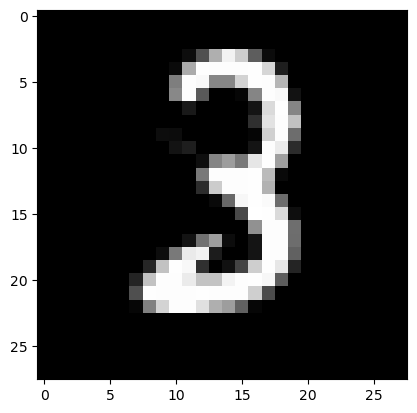

In [37]:
# interpret the image

digit = np.array(X_test.iloc[4])
digit = digit.reshape(28, 28)
plt.imshow(digit, cmap='gray')
plt.show()

In [39]:
submission_df.to_csv('submission.csv', index=False)